## 멕시코풍 프랜차이즈 Chipotle의 주문 데이터 분석하기

### <Step1. 탐색> : 데이터의 기초 정보 살펴보기

#### [Chipotle 데이터셋의 기본 정보]

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
file_path = 'data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')

In [2]:
print(chipo.shape)
print("------------------------------------")
print(chipo.info())

(4622, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


-----

### [Chipotle 데이터셋의 행과 열, 데이터]

In [4]:
# chipo 라는 Dataframe에서 순서대로 10개의 row 데이터를 보여줍니다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
print(chipo.columns)
print("------------------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------
RangeIndex(start=0, stop=4622, step=1)


-----

##### 이제 데이터의 수치적 특징 탐색을 위한 간단한 질문들을 정의합니다.

- quantity와 item_price의 요약 통계
- order_id와 item_name의 개수

### [Chipotle 데이터셋의 수치적 특징 파악]

##### describe 함수로 요약 통계량 출력하기

In [6]:
chipo['order_id'] = chipo['order_id'].astype(str) # order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환합니다.

In [7]:
print(chipo.describe()) # chipo dataframe에서 수치형 피처들의 요약 통계량을 확인합니다.

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


-----

##### unique 함수로 범주형 피처의 개수 출력하기

In [8]:
print(len(chipo['order_id'].unique())) # order_id의 개수를 출력합니다.
print(len(chipo['item_name'].unique())) # item_name의 개수를 출력합니다.

1834
50


-----

### <Step2. 인사이트의 발견> : 탐색과 시각화

-----
##### 다음으로, 인사이트를 발견할 수 있을만한 개념적 질문들을 정의합니다.

- 가장 많이 주문한 item은 무엇인지
- item당 주문의 총량은 얼마인지

### [가장 많이 주문한 item]

In [10]:
# 가장 많이 주문한 item : top 10을 출력합니다.
item_count = chipo['item_name'].value_counts()[:10]
item_count

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [8]:
# 가장 많이 주문한 item : top 10을 출력합니다.
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [9]:
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

-----

### [item당 주문 개수와 총량 구하기]

In [10]:
# item당 주문 개수를 출력합니다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # item당 주문 개수를 출력합니다.

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [11]:
# item당 주문 총량을 출력합니다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # item당 주문 총량을 출력합니다.

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

-----

### [시각화로 분석 결과 살펴보기]
- 지금까지의 분석 결과를 간단한 시각화로 표현

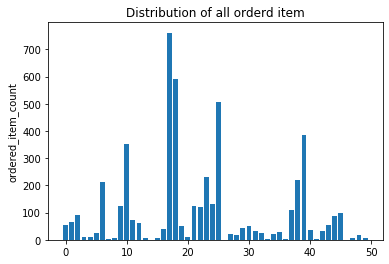

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
 
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')
 
plt.show()

-----

- pandas에서 유용하게 사용되는 함수 value_counts()와 unique()의 차이점

In [13]:
print(chipo['item_name'].value_counts()[:10])

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


In [14]:
print(type(chipo['item_name'].value_counts()))

<class 'pandas.core.series.Series'>


In [15]:
print(chipo['item_name'].unique()[:10])

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos']


In [16]:
print(type(chipo['item_name'].unique()))

<class 'numpy.ndarray'>


-----

### <Step3. 데이터 전처리> : 나만의 조력자를 정의하자

### [apply와 lambda 함수를 이용한 데이터 전처리]

In [17]:
print(chipo.info())
print('-------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null object
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(1), object(4)
memory usage: 180.6+ KB
None
-------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [18]:
# column 단위 데이터에 apply 함수로 전처리를 적용합니다.
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [19]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

-----

#### <Step4. 탐색적 분석>

##### 데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기


- 주문당 평균 계산금액 출력하기
- 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
- “Veggie Salad Bowl”이 몇 번 주문되었는지 구하기
- “Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기
-----

### [주문당 평균 계산금액 출력하기]

In [20]:
# 주문당 평균 계산금액을 출력합니다.
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [21]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

-----

### [한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기]

In [22]:
# 한 주문에 10달러 이상 사용한 id를 출력합니다.
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


-----

### [각 아이템의 가격 구하기]

In [23]:
# 각 아이템의 가격을 계산합니다.
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


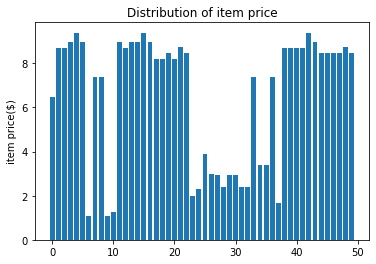

In [24]:
# 아이템 가격 분포 그래프를 출력합니다.
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
 
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
 
plt.show()

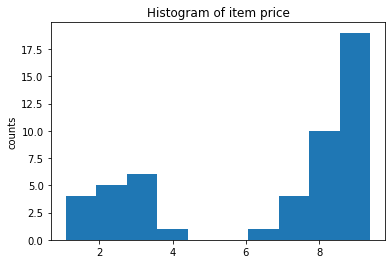

In [25]:
# 아이템 가격 히스토그램을 출력합니다.
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

-----

### [가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기]

In [26]:
# 가장 비싼 주문에서 item이 총 몇개 팔렸는지를 계산합니다.
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


-----

### [“Veggie Salad Bowl”이 몇 번 주문되었는지 구하기]

In [27]:
# “Veggie Salad Bowl”이 몇 번 주문되었는지를 계산합니다.
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id']) # 한 주문 내에서 중복 집계된 item_name을 제거합니다.

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


-----

### [“Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기]
#### 공지사항
- `'Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기` 문제의 출제 의도 오류가 있었습니다. 원래의 의도는 `'Chicken Bowl'을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴에 대한 총 주문 수량`에 대한 문제였습니다. 이슈를 제기해주신 장기식님께 감사드립니다.
- 따라서, 현재 문제의 의도대로 코드를 변경하였습니다. 기존의 출제 의도`“Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴에 대한 총 주문 수량`에 대한 코드는 아래에 추가해두었습니다.

In [30]:
# “Chicken Bowl”을 2개 이상 주문한 주문 횟수를 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result.shape[0])

33


In [31]:
# “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

# 인구데이터

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
pop1806 = pd.read_csv('data/2018.06.30.csv', encoding='utf-8')
pop1812 = pd.read_csv('data/2018.12.31.csv', encoding='utf-8')
pop1906 = pd.read_csv('data/2019.06.30.csv', encoding='utf-8')

In [2]:
pop1806.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      101 non-null    object
 1   총계      101 non-null    int64 
 2   총계 남    101 non-null    int64 
 3   총계 여    101 non-null    int64 
 4   중구 계    101 non-null    int64 
 5   중구 남    101 non-null    int64 
 6   중구 여    101 non-null    int64 
 7   동구 계    101 non-null    int64 
 8   동구 남    101 non-null    int64 
 9   동구 여    101 non-null    int64 
 10  서구 계    101 non-null    int64 
 11  서구 남    101 non-null    int64 
 12  서구 여    101 non-null    int64 
 13  남구 계    101 non-null    int64 
 14  남구 남    101 non-null    int64 
 15  남구 여    101 non-null    int64 
 16  북구 계    101 non-null    int64 
 17  북구 남    101 non-null    int64 
 18  북구 여    101 non-null    int64 
 19  수성구 계   101 non-null    int64 
 20  수성구 남   101 non-null    int64 
 21  수성구 여   101 non-null    int64 
 22  달서구 계   101 non-null    in

In [3]:
pop1812.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      101 non-null    object
 1   총계      101 non-null    int64 
 2   총계 남    101 non-null    int64 
 3   총계 여    101 non-null    int64 
 4   중구 계    101 non-null    int64 
 5   중구 남    101 non-null    int64 
 6   중구 여    101 non-null    int64 
 7   동구 계    101 non-null    int64 
 8   동구 남    101 non-null    int64 
 9   동구 여    101 non-null    int64 
 10  서구 계    101 non-null    int64 
 11  서구 남    101 non-null    int64 
 12  서구 여    101 non-null    int64 
 13  남구 계    101 non-null    int64 
 14  남구 남    101 non-null    int64 
 15  남구 여    101 non-null    int64 
 16  북구 계    101 non-null    int64 
 17  북구 남    101 non-null    int64 
 18  북구 여    101 non-null    int64 
 19  수성구 계   101 non-null    int64 
 20  수성구 남   101 non-null    int64 
 21  수성구 여   101 non-null    int64 
 22  달서구 계   101 non-null    in

In [4]:
pop1906.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    101 non-null    object
 1   총계      101 non-null    object
 2   총계 남    101 non-null    object
 3   총계 여    101 non-null    object
 4   중구 계    101 non-null    object
 5   중구 남    101 non-null    int64 
 6   중구 여    101 non-null    int64 
 7   동구 계    101 non-null    object
 8   동구 남    101 non-null    object
 9   동구 여    101 non-null    object
 10  서구 계    101 non-null    object
 11  서구 남    101 non-null    object
 12  서구 여    101 non-null    object
 13  남구 계    101 non-null    object
 14  남구 남    101 non-null    object
 15  남구 여    101 non-null    object
 16  북구 계    101 non-null    object
 17  북구 남    101 non-null    object
 18  북구 여    101 non-null    object
 19  수성구 계   101 non-null    object
 20  수성구 남   101 non-null    object
 21  수성구 여   101 non-null    object
 22  달서구 계   101 non-null    ob

In [5]:
pop1906 = pd.read_csv('data/2019.06.30.csv', thousands = ',')

In [6]:
pop1906.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    101 non-null    object
 1   총계      101 non-null    int64 
 2   총계 남    101 non-null    int64 
 3   총계 여    101 non-null    int64 
 4   중구 계    101 non-null    int64 
 5   중구 남    101 non-null    int64 
 6   중구 여    101 non-null    int64 
 7   동구 계    101 non-null    int64 
 8   동구 남    101 non-null    int64 
 9   동구 여    101 non-null    int64 
 10  서구 계    101 non-null    int64 
 11  서구 남    101 non-null    int64 
 12  서구 여    101 non-null    int64 
 13  남구 계    101 non-null    int64 
 14  남구 남    101 non-null    int64 
 15  남구 여    101 non-null    int64 
 16  북구 계    101 non-null    int64 
 17  북구 남    101 non-null    int64 
 18  북구 여    101 non-null    int64 
 19  수성구 계   101 non-null    int64 
 20  수성구 남   101 non-null    int64 
 21  수성구 여   101 non-null    int64 
 22  달서구 계   101 non-null    in

In [7]:
pop1806 = pop1806.rename({'달성군 여 ':'달성군 여'}, axis='columns')
pop1806

,구분,총계,총계 남,총계 여,중구 계,중구 남,중구 여,동구 계,동구 남,동구 여,...,북구 여,수성구 계,수성구 남,수성구 여,달서구 계,달서구 남,달서구 여,달성군 계,달성군 남,달성군 여
0,0세,14568,7488,7080,511,275,236,2263,1161,1102,...,1356,1784,911,873,3215,1719,1496,2724,1374,1350
1,1세,17475,8947,8528,609,309,300,2755,1410,1345,...,1670,2264,1170,1094,3818,2017,1801,3063,1543,1520
2,2세,19562,9985,9577,612,308,304,3000,1467,1533,...,1847,2684,1410,1274,4423,2317,2106,3327,1668,1659
3,3세,20123,10249,9874,648,315,333,3146,1656,1490,...,1856,2876,1423,1453,4661,2366,2295,3253,1638,1615
4,4세,19794,10069,9725,556,287,269,2971,1519,1452,...,1846,3089,1596,1493,4529,2294,2235,3036,1512,1524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96세,365,75,290,23,3,20,66,10,56,...,37,73,15,58,64,12,52,31,9,22
97,97세,235,45,190,18,3,15,35,13,22,...,36,43,7,36,39,6,33,16,3,13
98,98세,190,32,158,16,7,9,33,6,27,...,30,29,4,25,25,6,19,15,0,15
99,99세,112,26,86,6,1,5,25,7,18,...,13,17,4,13,19,2,17,8,2,6


In [8]:
pop1812 = pop1812.rename({'달성군 여 ':'달성군 여'}, axis='columns')
pop1812

,구분,총계,총계 남,총계 여,중구 계,중구 남,중구 여,동구 계,동구 남,동구 여,...,북구 여,수성구 계,수성구 남,수성구 여,달서구 계,달서구 남,달서구 여,달성군 계,달성군 남,달성군 여
0,0세,13993,7075,6918,521,272,249,2173,1100,1073,...,1318,1685,874,811,2954,1483,1471,2735,1362,1373
1,1세,16306,8442,7864,548,278,270,2569,1365,1204,...,1550,2097,1060,1037,3627,1959,1668,2968,1521,1447
2,2세,18774,9576,9198,656,325,331,2875,1433,1442,...,1791,2484,1313,1171,4160,2185,1975,3282,1624,1658
3,3세,20010,10252,9758,639,324,315,3055,1592,1463,...,1863,2858,1477,1381,4623,2363,2260,3264,1629,1635
4,4세,20020,10219,9801,594,310,284,3055,1541,1514,...,1838,3106,1592,1514,4571,2334,2237,3208,1622,1586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96세,369,74,295,21,1,20,62,10,52,...,51,64,18,46,64,11,53,31,10,21
97,97세,273,46,227,17,3,14,45,10,35,...,29,54,6,48,52,7,45,20,5,15
98,98세,178,37,141,18,6,12,31,9,22,...,33,25,2,23,17,6,11,8,1,7
99,99세,130,25,105,8,3,5,27,7,20,...,17,24,7,17,19,3,16,12,1,11


In [9]:
# people['총계'] = people['총계'].map(lambda x: x.replace(',',''))

In [10]:
# people['총계'] = people['총계'].astype(int)

In [11]:
# people[people.columns[2]] = people[people.columns[2]].map(lambda x: x.replace(',',''))

In [12]:
# for i in range(2,5):
#     people[people.columns[i]] = people[people.columns[i]].map(lambda x: x.replace(',','')).astype(int)
# for i in range(7,28):
#     people[people.columns[i]] = people[people.columns[i]].map(lambda x: x.replace(',','')).astype(int)

In [13]:
pop1806['구분'] = pop1806['구분'].map(lambda x: x.replace('세',''))
pop1806['구분'] = pop1806['구분'].map(lambda x: x.replace(' 이상',''))
pop1806['구분'] = pop1806['구분'].astype(int)

pop1812['구분'] = pop1812['구분'].map(lambda x: x.replace('세',''))
pop1812['구분'] = pop1812['구분'].map(lambda x: x.replace(' 이상',''))
pop1812['구분'] = pop1812['구분'].astype(int)

pop1906['행정구역'] = pop1906['행정구역'].map(lambda x: x.replace('세',''))
pop1906['행정구역'] = pop1906['행정구역'].map(lambda x: x.replace(' 이상',''))
pop1906['행정구역'] = pop1906['행정구역'].astype(int)

In [14]:
pop1906.rename(columns = {'행정구역' : '구분'}, inplace = True)

In [15]:
pop1906.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   구분      101 non-null    int32
 1   총계      101 non-null    int64
 2   총계 남    101 non-null    int64
 3   총계 여    101 non-null    int64
 4   중구 계    101 non-null    int64
 5   중구 남    101 non-null    int64
 6   중구 여    101 non-null    int64
 7   동구 계    101 non-null    int64
 8   동구 남    101 non-null    int64
 9   동구 여    101 non-null    int64
 10  서구 계    101 non-null    int64
 11  서구 남    101 non-null    int64
 12  서구 여    101 non-null    int64
 13  남구 계    101 non-null    int64
 14  남구 남    101 non-null    int64
 15  남구 여    101 non-null    int64
 16  북구 계    101 non-null    int64
 17  북구 남    101 non-null    int64
 18  북구 여    101 non-null    int64
 19  수성구 계   101 non-null    int64
 20  수성구 남   101 non-null    int64
 21  수성구 여   101 non-null    int64
 22  달서구 계   101 non-null    int64
 23  달서구 남   101 non

In [16]:
import numpy as np

In [17]:
pop_total = pop1806.sum().T

In [18]:
pop_total.head(20)

구분          5050
총계       2469617
총계 남     1224126
총계 여     1245491
중구 계       78530
중구 남       38094
중구 여       40436
동구 계      351892
동구 남      174342
동구 여      177550
서구 계      188705
서구 남       95117
서구 여       93588
남구 계      151890
남구 남       73504
남구 여       78386
북구 계      440142
북구 남      219735
북구 여      220407
수성구 계     435468
dtype: int64

In [19]:
pop_total = pd.DataFrame({'18_06월':pop_total})

In [20]:
pop_total

,18_06월
구분,5050
총계,2469617
총계 남,1224126
총계 여,1245491
중구 계,78530
중구 남,38094
중구 여,40436
동구 계,351892
동구 남,174342
동구 여,177550


In [21]:
pop1812_T = pop1812.sum().T
pop1906_T = pop1906.sum().T

In [22]:
pop1812_T = pd.DataFrame({'18_12월':pop1812_T})

In [23]:
pop_total['18_12월'] = pop1812_T['18_12월']

In [24]:
pop1906_T = pd.DataFrame({'19_06월':pop1906_T})
pop_total['19_06월'] = pop1906_T['19_06월']

In [25]:
pop_total

,18_06월,18_12월,19_06월
구분,5050,5050,5050
총계,2469617,2461769,2450478
총계 남,1224126,1219342,1212450
총계 여,1245491,1242427,1238028
중구 계,78530,79401,77935
중구 남,38094,38498,37661
중구 여,40436,40903,40274
동구 계,351892,351291,348825
동구 남,174342,173955,172401
동구 여,177550,177336,176424


In [26]:
pop_total['sub'] = pop_total['18_06월'] < pop_total['19_06월']

In [27]:
pop_total

,18_06월,18_12월,19_06월,sub
구분,5050,5050,5050,False
총계,2469617,2461769,2450478,False
총계 남,1224126,1219342,1212450,False
총계 여,1245491,1242427,1238028,False
중구 계,78530,79401,77935,False
중구 남,38094,38498,37661,False
중구 여,40436,40903,40274,False
동구 계,351892,351291,348825,False
동구 남,174342,173955,172401,False
동구 여,177550,177336,176424,False


In [28]:
pop_total['증감'] = pop_total['19_06월'] - pop_total['18_06월']
pop_total

,18_06월,18_12월,19_06월,sub,증감
구분,5050,5050,5050,False,0
총계,2469617,2461769,2450478,False,-19139
총계 남,1224126,1219342,1212450,False,-11676
총계 여,1245491,1242427,1238028,False,-7463
중구 계,78530,79401,77935,False,-595
중구 남,38094,38498,37661,False,-433
중구 여,40436,40903,40274,False,-162
동구 계,351892,351291,348825,False,-3067
동구 남,174342,173955,172401,False,-1941
동구 여,177550,177336,176424,False,-1126


In [29]:
pop1806['인구'] = (pd.DataFrame(range(0,101))/10).astype(int)*10
pop1806['인구'] = np.where(pop1806['인구'] >= 70, 70, pop1806.인구)
pop1806 = pop1806.groupby('인구')

In [30]:
pop1806 = pop1806.sum()
pop1806 = pop1806.drop(['구분'], axis=1)
pop1806

,총계,총계 남,총계 여,중구 계,중구 남,중구 여,동구 계,동구 남,동구 여,서구 계,...,북구 여,수성구 계,수성구 남,수성구 여,달서구 계,달서구 남,달서구 여,달성군 계,달성군 남,달성군 여
인구,,,,,,,,,,,,,,,,,,,,,
0,198201,101712,96489,5674,2952,2722,29075,14987,14088,9719,...,18260,32508,16713,15795,46276,23865,22411,29751,15132,14619
10,254854,134152,120702,5549,2801,2748,29903,15815,14088,14006,...,23284,57880,30792,27088,63987,33506,30481,23382,12302,11080
20,333016,180686,152330,11300,5611,5689,43608,23707,19901,25542,...,27737,58097,31464,26633,82987,45010,37977,29853,16533,13320
30,321372,164102,157270,11396,5877,5519,48971,25221,23750,21529,...,28127,46528,22290,24238,72962,37075,35887,43404,22386,21018
40,412818,203604,209214,11358,5868,5490,54564,28261,26303,27671,...,39635,79395,36264,43131,98641,47547,51094,40726,21246,19480
50,428671,210362,218309,12107,6000,6107,59064,28461,30603,38473,...,37602,74095,36270,37825,104487,50800,53687,38816,19554,19262
60,286686,136656,150030,10243,4642,5601,46790,21842,24948,29106,...,23545,46530,21938,24592,61842,30114,31728,23984,11985,11999
70,233999,92852,141147,10903,4343,6560,39917,16048,23869,22659,...,22217,40435,16218,24217,43938,17326,26612,17954,7004,10950


In [31]:
pop1806_man = pop1806.loc[:,['총계 남','중구 남','동구 남','서구 남','남구 남','북구 남','수성구 남','달서구 남','달성군 남']]

In [32]:
pop1806_man

,총계 남,중구 남,동구 남,서구 남,남구 남,북구 남,수성구 남,달서구 남,달성군 남
인구,,,,,,,,,
0,101712,2952,14987,4936,3986,19141,16713,23865,15132
10,134152,2801,15815,7406,5829,25701,30792,33506,12302
20,180686,5611,23707,14240,10837,33284,31464,45010,16533
30,164102,5877,25221,11920,9790,29543,22290,37075,22386
40,203604,5868,28261,14669,11423,38326,36264,47547,21246
50,210362,6000,28461,19174,12691,37412,36270,50800,19554
60,136656,4642,21842,13749,10382,22004,21938,30114,11985
70,92852,4343,16048,9023,8566,14324,16218,17326,7004


In [33]:
pop1806_woman = pop1806.loc[:,['총계 여','중구 여','동구 여','서구 여','남구 여','북구 여','수성구 여','달서구 여','달성군 여']]
pop1806_woman

,총계 여,중구 여,동구 여,서구 여,남구 여,북구 여,수성구 여,달서구 여,달성군 여
인구,,,,,,,,,
0,96489,2722,14088,4783,3811,18260,15795,22411,14619
10,120702,2748,14088,6600,5333,23284,27088,30481,11080
20,152330,5689,19901,11302,9771,27737,26633,37977,13320
30,157270,5519,23750,9609,9122,28127,24238,35887,21018
40,209214,5490,26303,13002,11079,39635,43131,51094,19480
50,218309,6107,30603,19299,13924,37602,37825,53687,19262
60,150030,5601,24948,15357,12260,23545,24592,31728,11999
70,141147,6560,23869,13636,13086,22217,24217,26612,10950


In [34]:
pop1806_total = pop1806.drop(['총계 남','중구 남','동구 남','서구 남','남구 남','북구 남','수성구 남','달서구 남','달성군 남','총계 여','중구 여','동구 여','서구 여','남구 여','북구 여','수성구 여','달서구 여','달성군 여'],axis=1)

In [35]:
pop1806_total

,총계,중구 계,동구 계,서구 계,남구 계,북구 계,수성구 계,달서구 계,달성군 계
인구,,,,,,,,,
0,198201,5674,29075,9719,7797,37401,32508,46276,29751
10,254854,5549,29903,14006,11162,48985,57880,63987,23382
20,333016,11300,43608,25542,20608,61021,58097,82987,29853
30,321372,11396,48971,21529,18912,57670,46528,72962,43404
40,412818,11358,54564,27671,22502,77961,79395,98641,40726
50,428671,12107,59064,38473,26615,75014,74095,104487,38816
60,286686,10243,46790,29106,22642,45549,46530,61842,23984
70,233999,10903,39917,22659,21652,36541,40435,43938,17954


In [36]:
pop1806_total

,총계,중구 계,동구 계,서구 계,남구 계,북구 계,수성구 계,달서구 계,달성군 계
인구,,,,,,,,,
0,198201,5674,29075,9719,7797,37401,32508,46276,29751
10,254854,5549,29903,14006,11162,48985,57880,63987,23382
20,333016,11300,43608,25542,20608,61021,58097,82987,29853
30,321372,11396,48971,21529,18912,57670,46528,72962,43404
40,412818,11358,54564,27671,22502,77961,79395,98641,40726
50,428671,12107,59064,38473,26615,75014,74095,104487,38816
60,286686,10243,46790,29106,22642,45549,46530,61842,23984
70,233999,10903,39917,22659,21652,36541,40435,43938,17954


In [37]:
label = pop1806_total.index
label

Int64Index([0, 10, 20, 30, 40, 50, 60, 70], dtype='int64', name='인구')

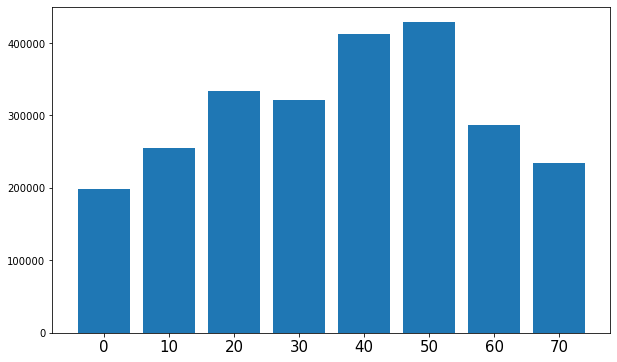

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
index = np.arange(len(pop1806_total.index))
value = pop1806_total['총계']

plt.bar(index, value)
plt.xticks(index, label, fontsize=15)
plt.show()

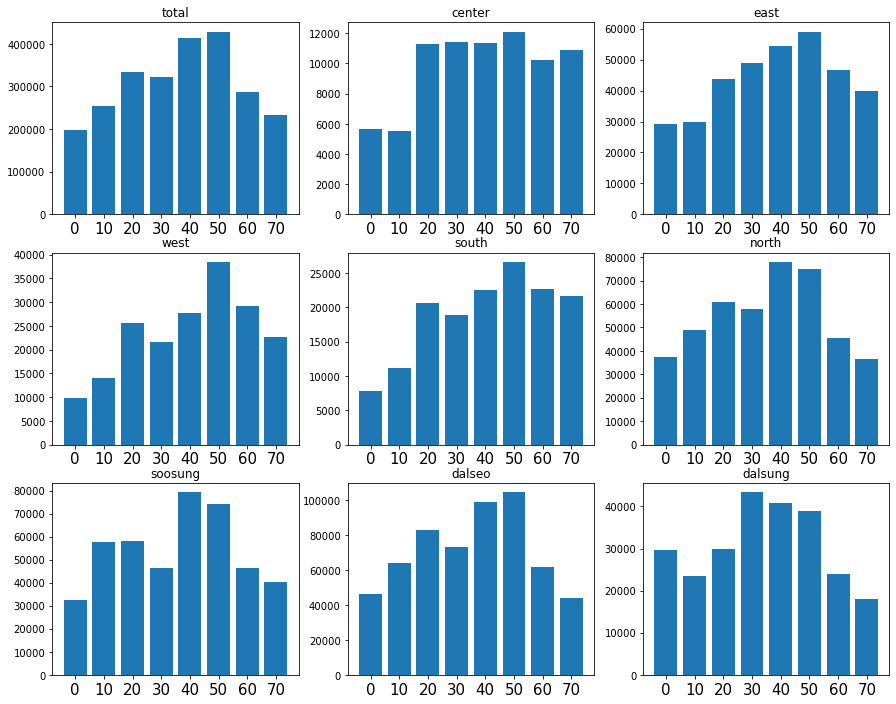

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fig = plt.figure(figsize=(15, 12))
index = np.arange(len(pop1806_total.index))

ax1 = fig.add_subplot(3,3,1)
value1 = pop1806_total['총계']
ax1.bar(index, value1)
plt.xticks(index, label, fontsize=15)
# plt.ylim(0, pop1806_total['총계'].max())
ax1.set_title('total')

ax2 = fig.add_subplot(3,3,2)
value2 = pop1806_total['중구 계']
ax2.bar(index, value2)
plt.xticks(index, label, fontsize=15)
# plt.ylim(0, pop1806_total['중구 계'].max())
ax2.set_title('center')

ax3 = fig.add_subplot(3,3,3)
value3 = pop1806_total['동구 계']
ax3.bar(index, value3)
plt.xticks(index, label, fontsize=15)
# plt.ylim(0, pop1806_total['동구 계'].max())
ax3.set_title('east')

ax4 = fig.add_subplot(3,3,4)
value4 = pop1806_total['서구 계']
ax4.bar(index, value4)
plt.xticks(index, label, fontsize=15)
# plt.ylim(0, pop1806_total['동구 계'].max())
ax4.set_title('west')

ax5 = fig.add_subplot(3,3,5)
value5 = pop1806_total['남구 계']
ax5.bar(index, value5)
plt.xticks(index, label, fontsize=15)
# plt.ylim(0, pop1806_total['동구 계'].max())
ax5.set_title('south')

ax6 = fig.add_subplot(3,3,6)
value6 = pop1806_total['북구 계']
ax6.bar(index, value6)
plt.xticks(index, label, fontsize=15)
# plt.ylim(0, pop1806_total['동구 계'].max())
ax6.set_title('north')

ax7 = fig.add_subplot(3,3,7)
value7 = pop1806_total['수성구 계']
ax7.bar(index, value7)
plt.xticks(index, label, fontsize=15)
# plt.ylim(0, pop1806_total['동구 계'].max())
ax7.set_title('soosung')

ax8 = fig.add_subplot(3,3,8)
value8 = pop1806_total['달서구 계']
ax8.bar(index, value8)
plt.xticks(index, label, fontsize=15)
# plt.ylim(0, pop1806_total['동구 계'].max())
ax8.set_title('dalseo')

ax9 = fig.add_subplot(3,3,9)
value9 = pop1806_total['달성군 계']
ax9.bar(index, value9)
plt.xticks(index, label, fontsize=15)
# plt.ylim(0, pop1806_total['동구 계'].max())
ax9.set_title('dalsung')


plt.show()